In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
iid_dfs = [
    pd.read_csv(
        f"train_iid_iris_norm_{idx}.csv",
        header=None,
    )
    for idx in range(5)
]
niid_dfs = [
    pd.read_csv(
        f"train_niid_iris_norm_{idx}.csv",
        header=None,
    )
    for idx in range(5)
]

In [9]:
for idx, iid_df in enumerate(iid_dfs):
    iid_df.rename(columns={4: 'labels'}, inplace=True)
for idx, niid_df in enumerate(niid_dfs):
    niid_df.rename(columns={4: 'labels'}, inplace=True)


In [10]:
from collections import Counter


In [11]:
for idx, iid_df in enumerate(iid_dfs):
    print(f"Dataset {idx}")
    print(Counter(iid_df['labels']))

Dataset 0
Counter({0.0: 43, 2.0: 40, 1.0: 37})
Dataset 1
Counter({2.0: 43, 0.0: 41, 1.0: 36})
Dataset 2
Counter({1.0: 44, 0.0: 39, 2.0: 37})
Dataset 3
Counter({1.0: 42, 2.0: 40, 0.0: 38})
Dataset 4
Counter({2.0: 45, 0.0: 42, 1.0: 33})


| Dataset   | 0.0 | 1.0 | 2.0 |
|-----------|-----|-----|-----|
| Dataset 0 |  43 |  37 |  40 |
| Dataset 1 |  41 |  36 |  43 |
| Dataset 2 |  39 |  44 |  37 |
| Dataset 3 |  38 |  42 |  40 |
| Dataset 4 |  42 |  33 |  45 |


In [12]:
for idx, niid_df in enumerate(niid_dfs):
    print(f"Dataset {idx}")
    print(Counter(niid_df["labels"]))

Dataset 0
Counter({2.0: 120})
Dataset 1
Counter({2.0: 85, 0.0: 20, 1.0: 15})
Dataset 2
Counter({0.0: 120})
Dataset 3
Counter({1.0: 120})
Dataset 4
Counter({0.0: 63, 1.0: 57})


| Dataset   | 0.0 | 1.0 | 2.0 |
|-----------|-----|-----|-----|
| Dataset 0 |  -  |  -  | 120 |
| Dataset 1 |  20 |  15 |  85 |
| Dataset 2 | 120 |  -  |  -  |
| Dataset 3 |  -  | 120 |  -  |
| Dataset 4 |  63 |  57 |  -  |


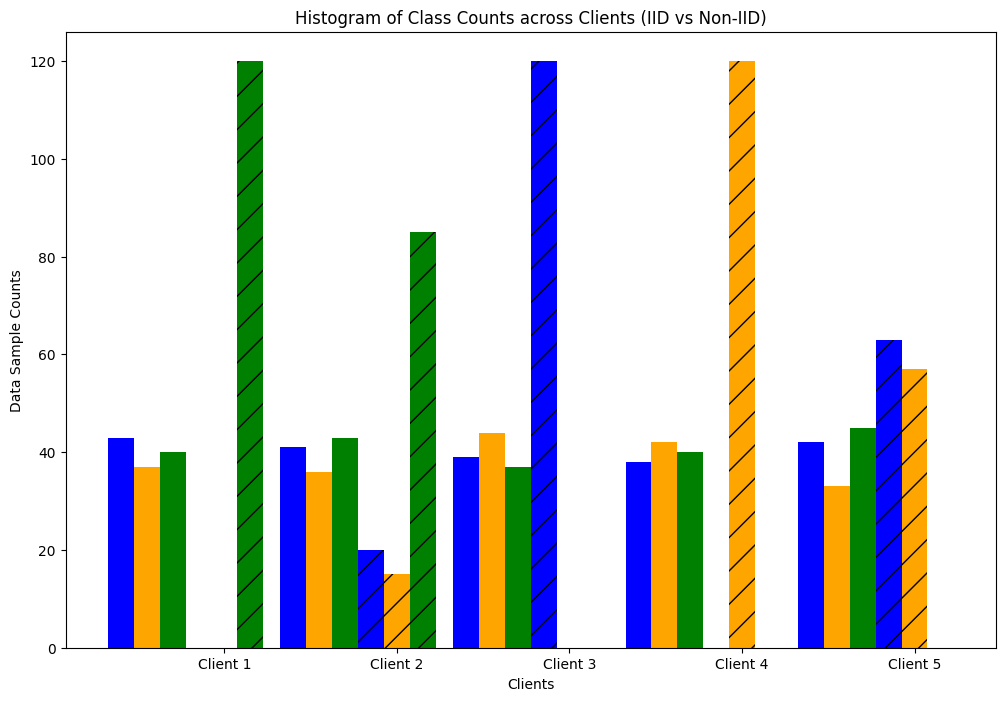

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

# Data for IID setting
datasets = ["Client 1", "Client 2", "Client 3", "Client 4", "Client 5"]
counts_0_iid = [43, 41, 39, 38, 42]  # Counts for class 0.0
counts_1_iid = [37, 36, 44, 42, 33]  # Counts for class 1.0
counts_2_iid = [40, 43, 37, 40, 45]  # Counts for class 2.0

# Data for Non-IID setting
counts_0_non_iid = [0, 20, 120, 0, 63]  # Counts for class 0.0
counts_1_non_iid = [0, 15, 0, 120, 57]  # Counts for class 1.0
counts_2_non_iid = [120, 85, 0, 0, 0]  # Counts for class 2.0

x = np.arange(len(datasets))  # the label locations
width = 0.15  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot IID data
bars1_iid = ax.bar(
    x - width * 1.5, counts_0_iid, width, label="Class 0.0 (IID)", color="blue"
)
bars2_iid = ax.bar(
    x - width * 0.5, counts_1_iid, width, label="Class 1.0 (IID)", color="orange"
)
bars3_iid = ax.bar(
    x + width * 0.5, counts_2_iid, width, label="Class 2.0 (IID)", color="green"
)

# Plot Non-IID data
bars1_non_iid = ax.bar(
    x + width * 1.5,
    counts_0_non_iid,
    width,
    label="Class 0.0 (Non-IID)",
    color="blue",
    hatch="/",
)
bars2_non_iid = ax.bar(
    x + width * 2.5,
    counts_1_non_iid,
    width,
    label="Class 1.0 (Non-IID)",
    color="orange",
    hatch="/",
)
bars3_non_iid = ax.bar(
    x + width * 3.5,
    counts_2_non_iid,
    width,
    label="Class 2.0 (Non-IID)",
    color="green",
    hatch="/",
)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel("Clients")
ax.set_ylabel("Data Sample Counts")
ax.set_title("Histogram of Class Counts across Clients (IID vs Non-IID)")
ax.set_xticks(x + width * 2.5)  # Adjust the ticks to match the center of the bars
ax.set_xticklabels(datasets)
# ax.legend()

# Adjust layout
tikzplotlib.save("histogram-iris-iid-niid.tex")

# Show the plot
plt.show()